# Installing/Loading Libraries 

In [61]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [65]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import requests
import missingno as msno
import warnings
import scipy.stats as stats


from io import StringIO
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from tqdm import tqdm 


label_encoder = LabelEncoder()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

# Abount Data

- **ID** (`int64`): A unique identifier for each user.
- **InDegree** (`int64`): The number of unique users who have replied to or quoted this user's posts.
- **OutDegree** (`int64`): The number of unique users to whom this user has sent posts or quotes.
- **TotalPosts** (`int64`): The total number of posts made by the user.
- **MeanWordCount** (`float64`): The average word count across all posts made by the user.
- **LikeRate** (`float64`): The average number of likes received per post.
- **PercentQuestions** (`float64`): The percentage of the user's posts that contain questions.
- **PercentURLs** (`float64`): The percentage of the user's posts that contain URLs.
- **MeanPostsPerThread** (`float64`): The average number of posts made by the user in each thread they participated in.
- **InitiationRatio** (`float64`): The ratio of threads initiated by the user to the total number of threads they participated in.
- **MeanPostsPerSubForum** (`float64`): The average number of posts made by the user in each subforum they participated in.
- **PercBiNeighbours** (`float64`): The percentage of bidirectional neighbors, i.e., users to whom this user has replied and who have replied to this user.
- **AccountAge** (`int64`): The age of the user's account in months.

In [66]:
df=pd.read_csv('Data_DMML.csv')

In [67]:
df.head()

,ID,InDegree,OutDegree,TotalPosts,MeanWordCount,LikeRate,PercentQuestions,PercentURLs,MeanPostsPerThread,InitiationRatio,MeanPostsPerSubForum,PercBiNeighbours,AccountAge
0,0,53,54,83,63.0,0.759036,0.325301,0.072289,1.596154,0.192308,9.222222,0.289157,108
1,1,25,25,67,151.0,0.089552,0.104478,0.074627,2.913043,0.826087,67.000000,0.351351,54
2,2,4,3,4,65.0,0.250000,0.000000,0.000000,2.000000,0.500000,2.000000,0.000000,55
3,3,79,84,191,33.0,0.837696,0.157068,0.036649,1.929293,0.111111,14.692308,0.405172,43
4,4,2,3,3,25.0,0.000000,0.333333,0.000000,1.000000,0.000000,1.500000,0.250000,89


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2307 entries, 0 to 2306
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2307 non-null   int64  
 1   InDegree              2307 non-null   int64  
 2   OutDegree             2307 non-null   int64  
 3   TotalPosts            2307 non-null   int64  
 4   MeanWordCount         2307 non-null   float64
 5   LikeRate              2307 non-null   float64
 6   PercentQuestions      2307 non-null   float64
 7   PercentURLs           2307 non-null   float64
 8   MeanPostsPerThread    2307 non-null   float64
 9   InitiationRatio       2307 non-null   float64
 10  MeanPostsPerSubForum  2307 non-null   float64
 11  PercBiNeighbours      2307 non-null   float64
 12  AccountAge            2307 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 234.4 KB


In [69]:
# Summary Statistics
print("\nSummary Statistics:\n")
df.describe()


Summary Statistics:



,ID,InDegree,OutDegree,TotalPosts,MeanWordCount,LikeRate,PercentQuestions,PercentURLs,MeanPostsPerThread,InitiationRatio,MeanPostsPerSubForum,PercBiNeighbours,AccountAge
count,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000
mean,1153.000000,36.319029,39.357174,79.699610,114.691844,0.587254,0.295906,0.068508,2.201240,0.229689,9.949544,0.238960,55.925878
std,666.117857,57.810106,67.614166,182.971141,149.647263,0.773175,0.235612,0.154455,3.494756,0.306419,24.275245,0.197268,31.587859
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,576.500000,3.000000,3.000000,4.000000,45.124250,0.083333,0.129320,0.000000,1.189577,0.000000,2.000000,0.083333,28.000000
50%,1153.000000,11.000000,10.000000,14.000000,75.153800,0.412651,0.274510,0.000000,1.595238,0.093023,4.000000,0.232558,56.000000
75%,1729.500000,42.000000,43.000000,63.000000,132.000000,0.833333,0.416667,0.063733,2.200000,0.333333,9.500000,0.350676,84.000000
max,2306.000000,416.000000,571.000000,1835.000000,3118.000000,16.000000,1.000000,1.000000,87.000000,2.000000,623.000000,1.000000,108.000000


In [70]:
def table_summary(data):
    summary_data = []
    
    for column in data.columns:
        num_unique_values = data[column].nunique()
        num_empty_values = data[column].isnull().sum()
        data_type = data[column].dtypes
        percentage_empty = (num_empty_values / len(data)) * 100
        summary_data.append([column, num_unique_values, num_empty_values, percentage_empty, data_type])

    summary_df = pd.DataFrame(summary_data, columns=['Column Name', 'Unique Values', 'Empty Values', 'Percentage Empty', 'Data Type'])

    print(f'''Table Summary
Dataframe Shape: {data.shape}''')
    
    
    display(summary_df)
    msno.bar(data,color='skyblue')
    plt.title('Missing Values Overview', fontsize=16)
    plt.xlabel('Columns', fontsize=14)
    plt.ylabel('Percentage of Missing Values', fontsize=14)
    plt.xticks(rotation=90)
    plt.show()

Table Summary
Dataframe Shape: (2307, 13)


,Column Name,Unique Values,Empty Values,Percentage Empty,Data Type
0,ID,2307,0,0.0,int64
1,InDegree,245,0,0.0,int64
2,OutDegree,260,0,0.0,int64
3,TotalPosts,391,0,0.0,int64
4,MeanWordCount,1437,0,0.0,float64
5,LikeRate,927,0,0.0,float64
6,PercentQuestions,773,0,0.0,float64
7,PercentURLs,576,0,0.0,float64
8,MeanPostsPerThread,806,0,0.0,float64
9,InitiationRatio,514,0,0.0,float64


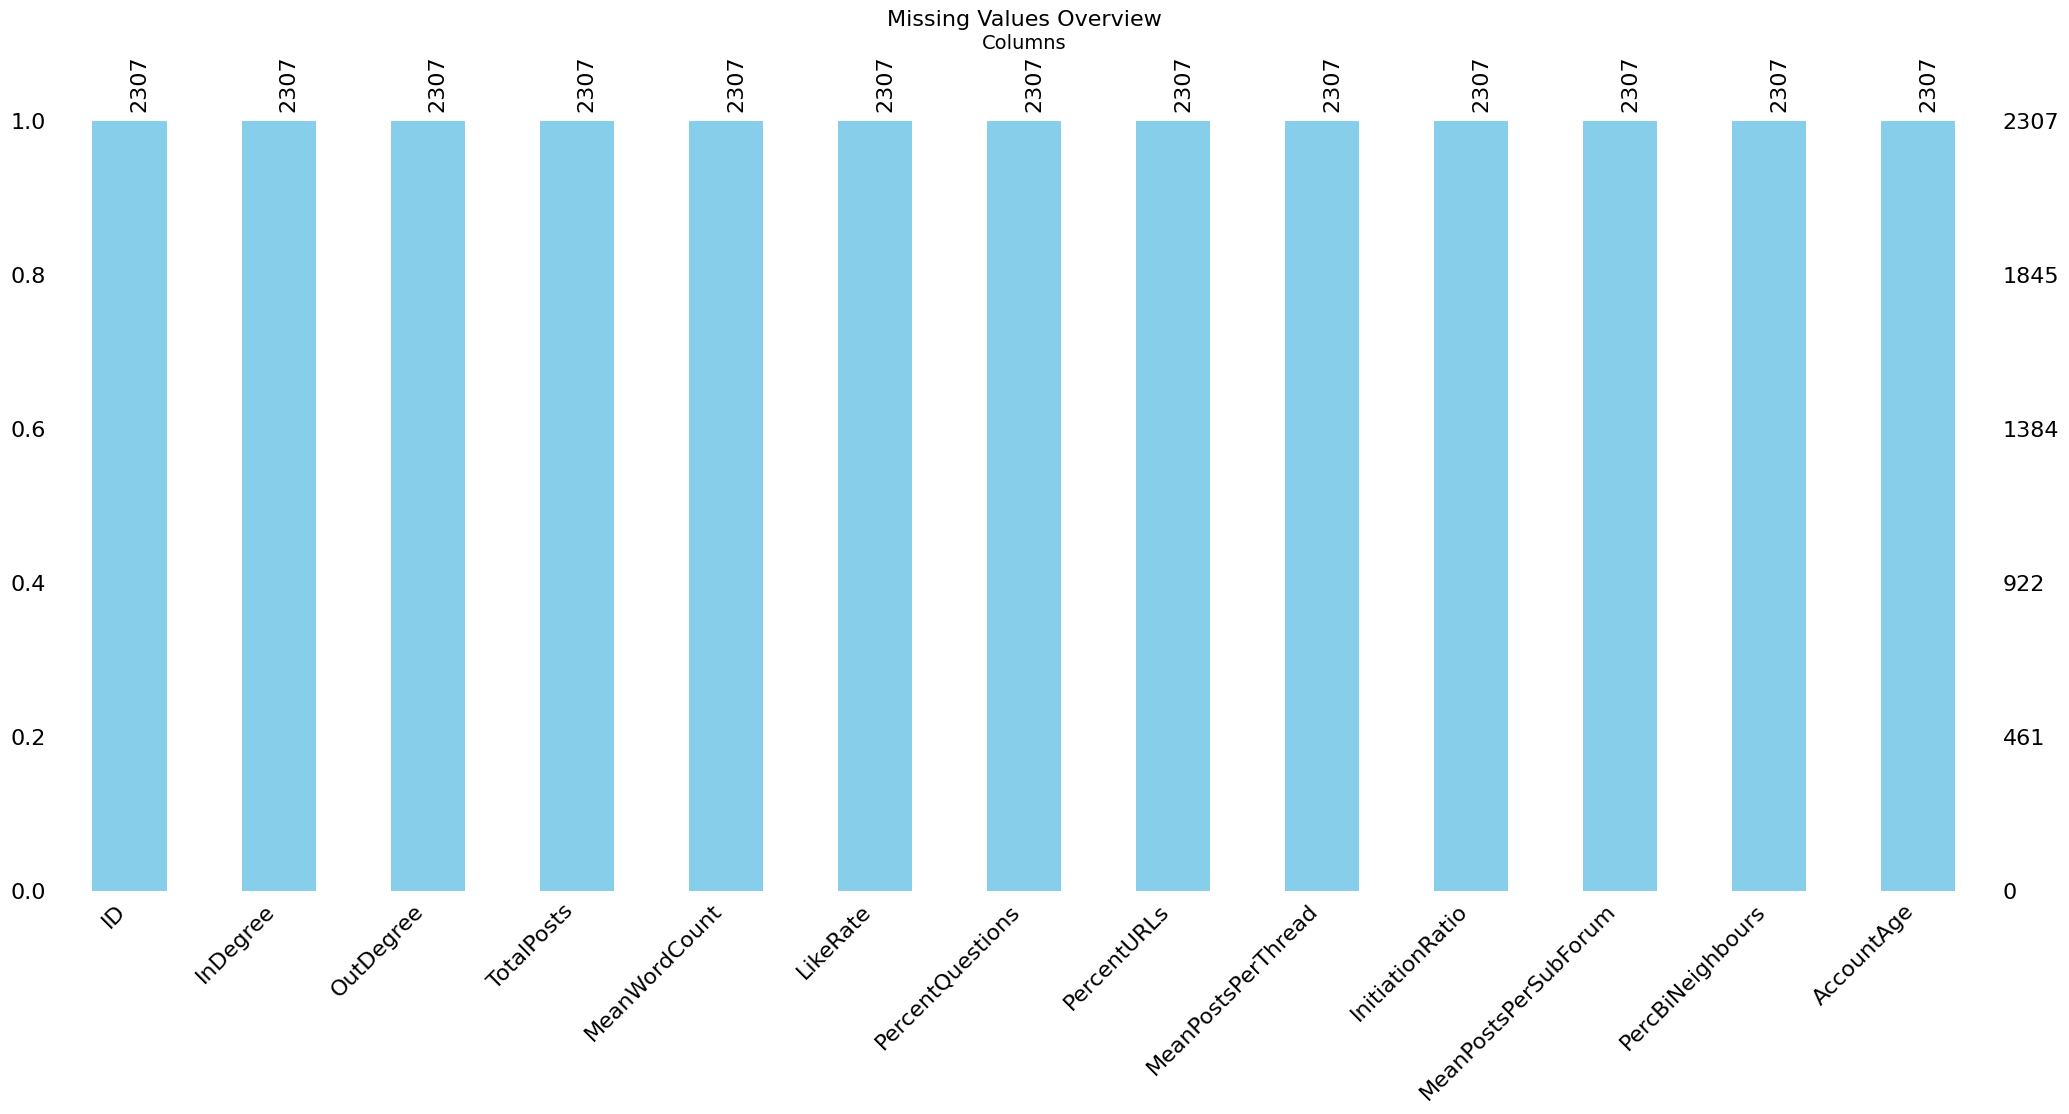

In [71]:
table_summary(df)

None of the data are missing, Now I need to check if there are any duplicate values in this dataset


In [72]:
# Check for duplicates
duplicates = df.duplicated()

num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


# EDA

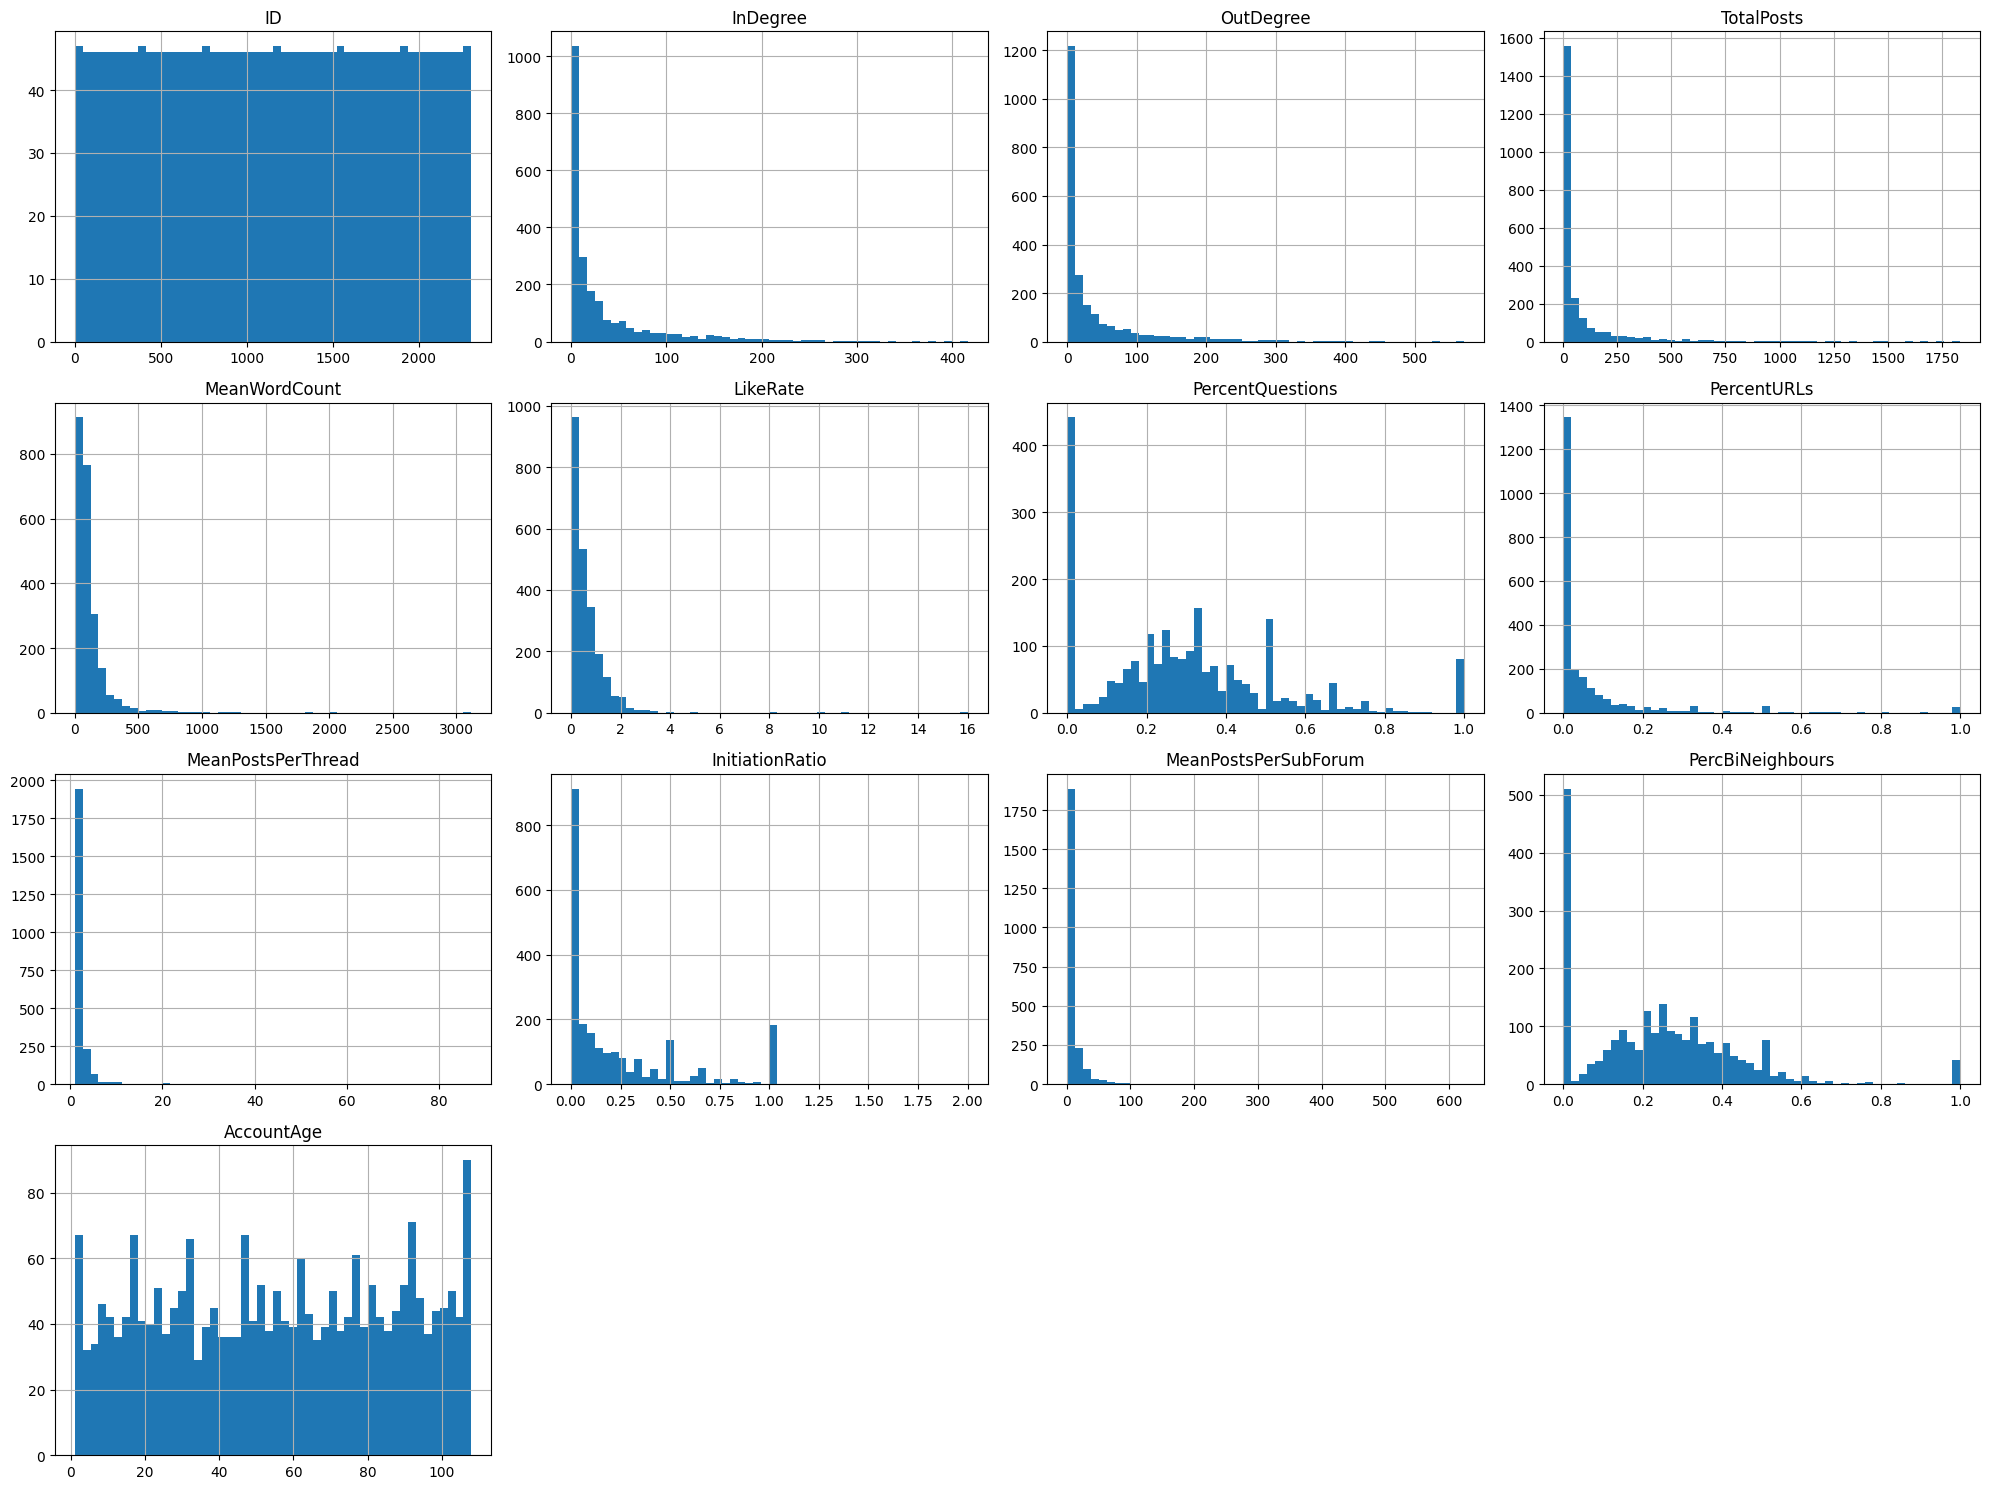

In [74]:
# Data Distribution
df.hist(figsize=(20, 15), bins=50)
plt.tight_layout()
plt.show()

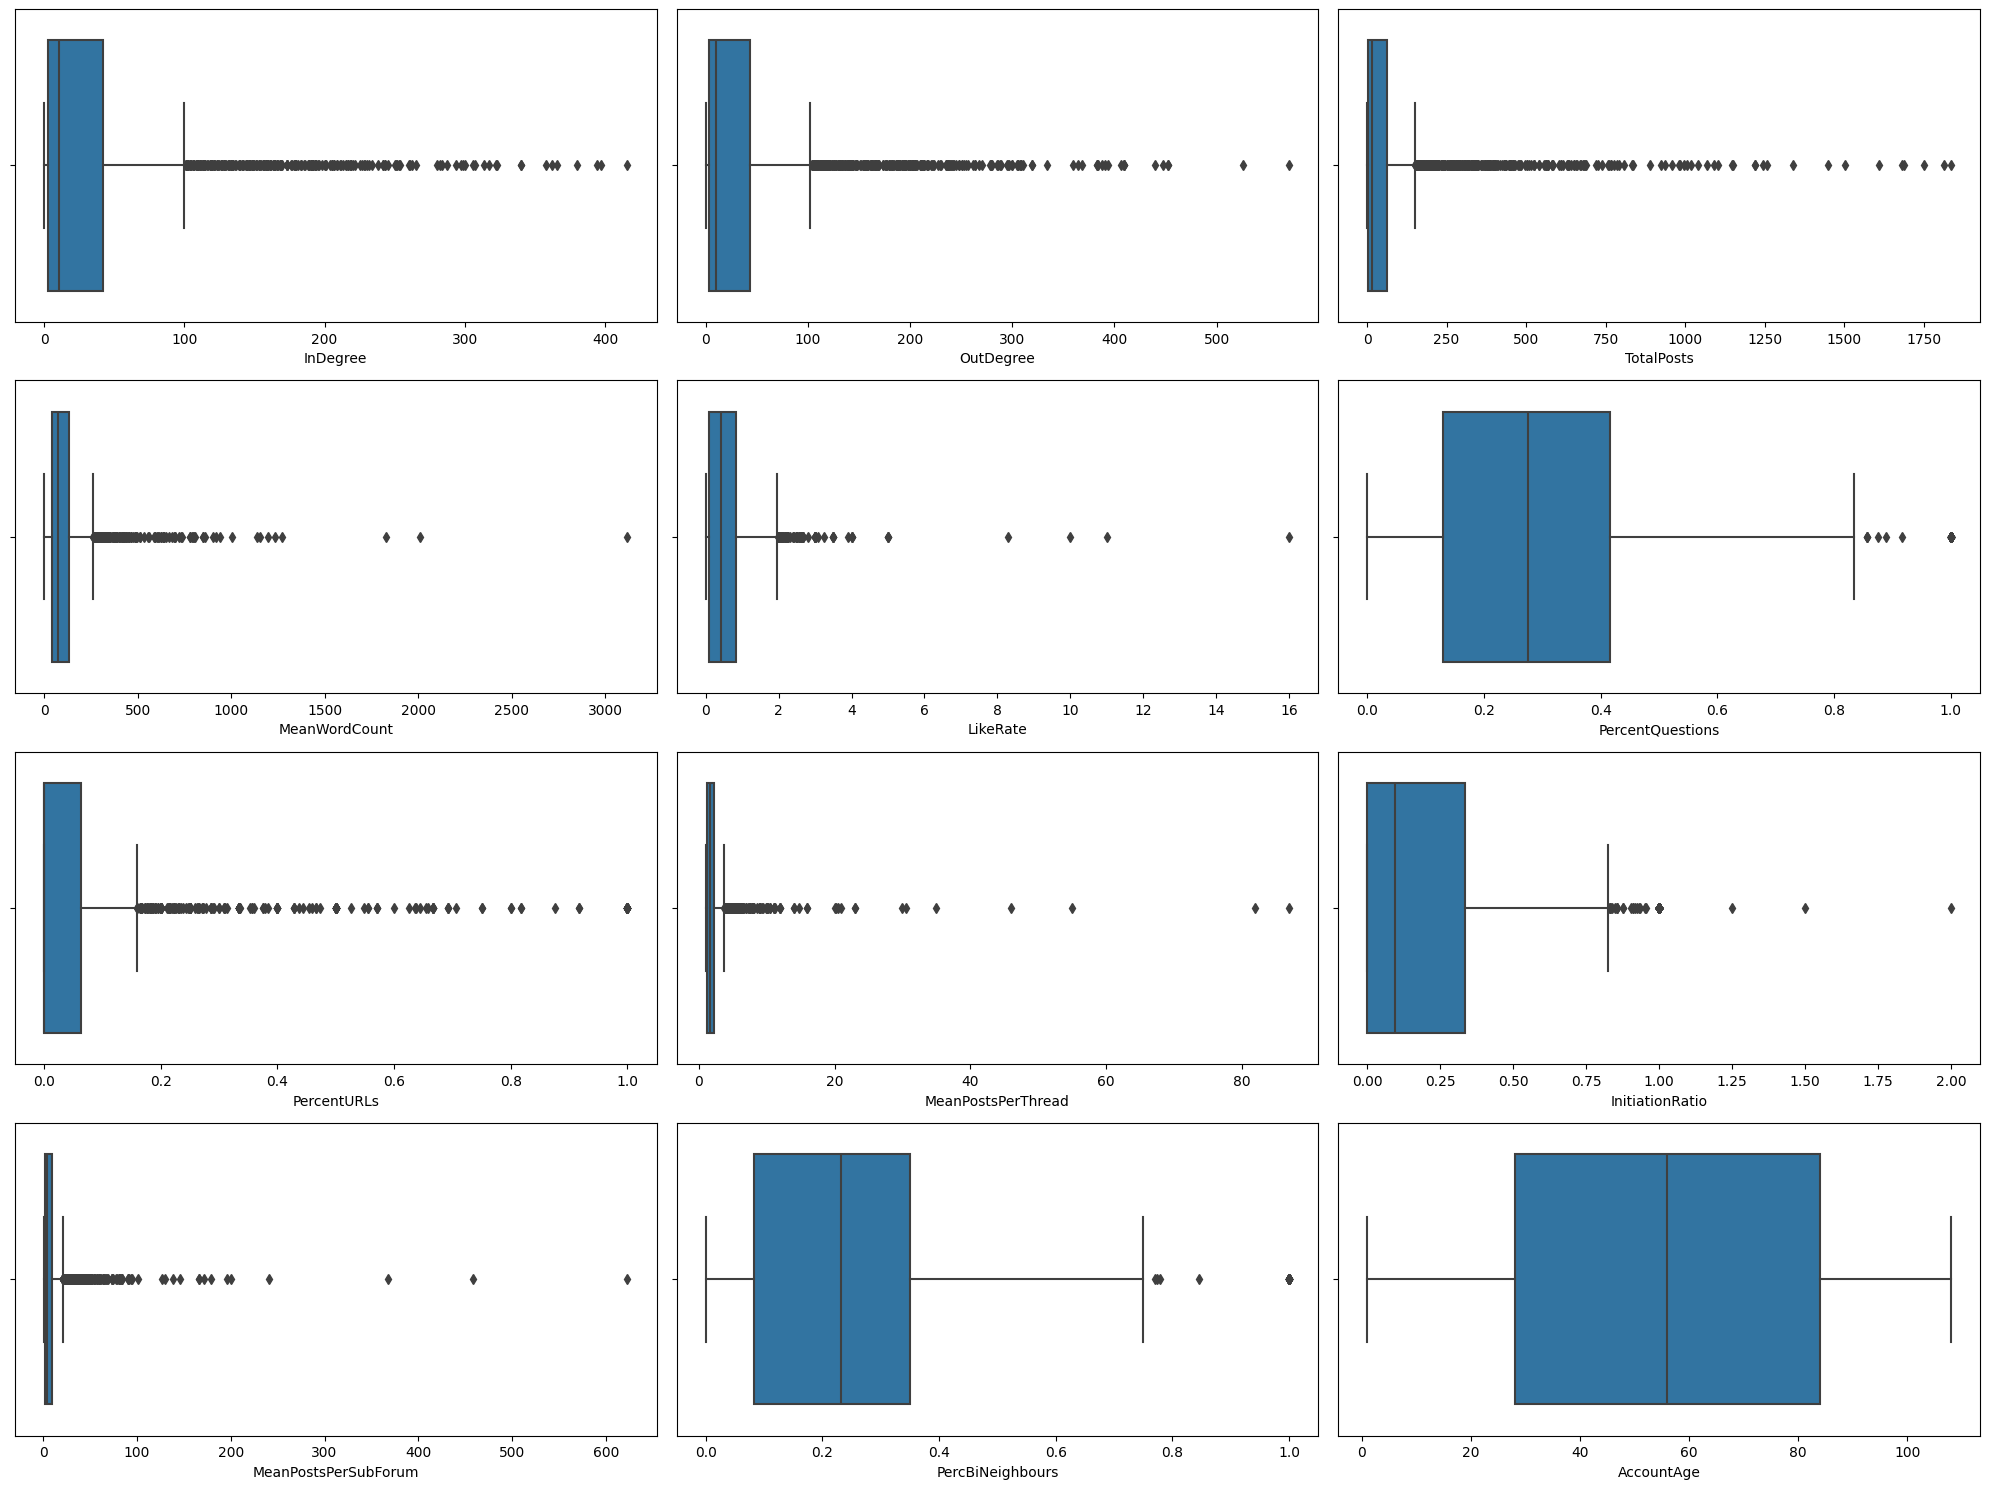

In [75]:
# Outlier Detection using Box Plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
for i, col in enumerate(df.columns[1:]):  # Skipping 'ID' column
    sns.boxplot(data=df, x=col, ax=axes[i//3, i%3])
plt.tight_layout()
plt.show()

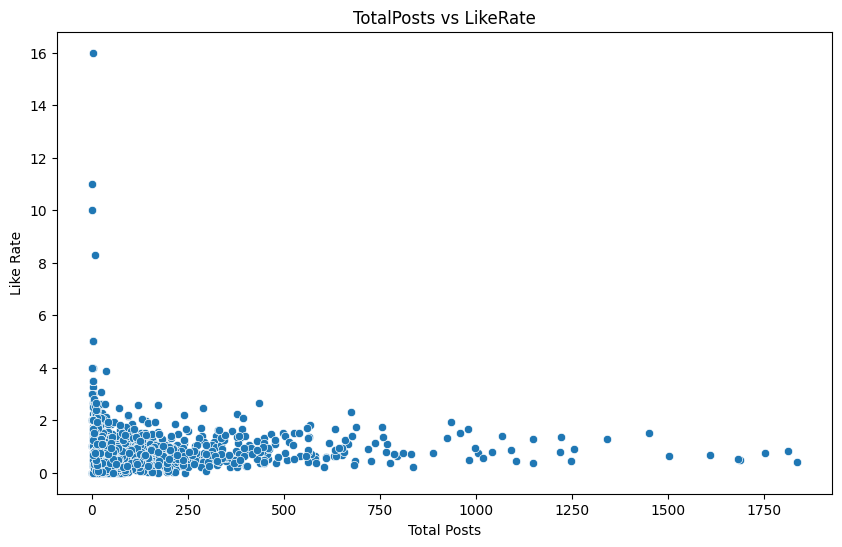

In [76]:
# Visualizing Relationships
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='TotalPosts', y='LikeRate', scatter_kws={'alpha':0.3})
plt.title('TotalPosts vs LikeRate')
plt.xlabel('Total Posts')
plt.ylabel('Like Rate')
plt.show()

The scatter plot "TotalPosts vs LikeRate" provides insights into the relationship between a user's posting activity and the engagement their content receives on a social media platform. This suggests a potential negative correlation between TotalPosts and LikeRate, where users who post more frequently tend to have a lower average number of likes per post, and vice versa. This could be interpreted as follows:

1. Users who post less frequently may prioritize content quality, resulting in higher engagement (likes) per post.
2. Users who post more frequently may be overwhelming their audience, leading to lower engagement per post.

The observed relationship could be influenced by various other factors not represented in this plot, such as content type, posting strategies, audience demographics, or the user's overall following.

Limitations:
While the scatter plot provides a high-level overview of the relationship between posting activity and engagement, it does not account for other potential factors that could impact user engagement. Additionally, the plot does not differentiate between different types of users (e.g., individuals, businesses, influencers) or content formats, which could exhibit varying engagement patterns.

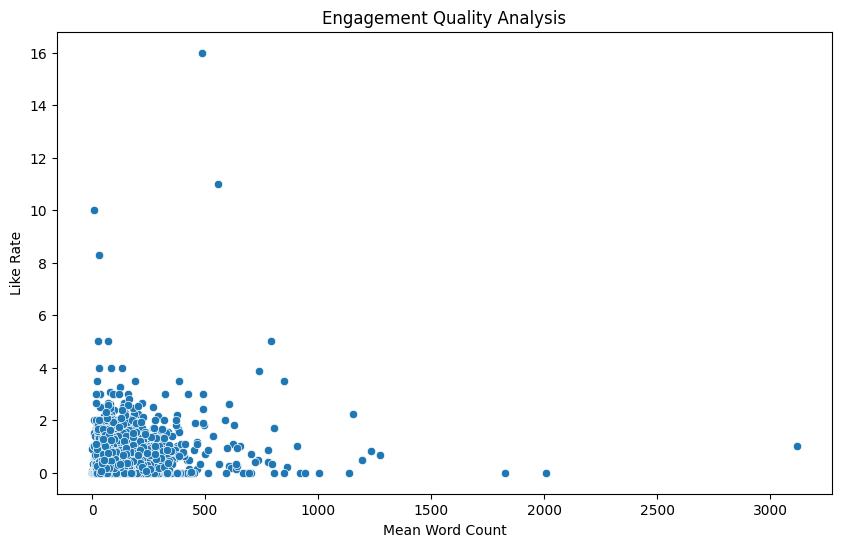

In [77]:
# Engagement Quality Analysis
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='MeanWordCount', y='LikeRate', scatter_kws={'alpha':0.3})
plt.title('Engagement Quality Analysis')
plt.xlabel('Mean Word Count')
plt.ylabel('Like Rate')
plt.show()

The scatter plot titled "Engagement Quality Analysis" depicts the relationship between the mean word count of posts and the like rate. The majority of points are clustered at the lower end of both axes, indicating that most posts have a lower mean word count and a lower like rate. There appears to be a positive correlation between mean word count and like rate, as some of the points with higher word counts also have higher like rates. However, this trend is not strong, as there are many points with a high word count but a low like rate. The relationship is not definitive, as there are many exceptions. The like rate is used as a proxy for engagement quality, but it is important to note that engagement can be multifaceted, including other factors such as comments, shares, and the sentiment of interactions.

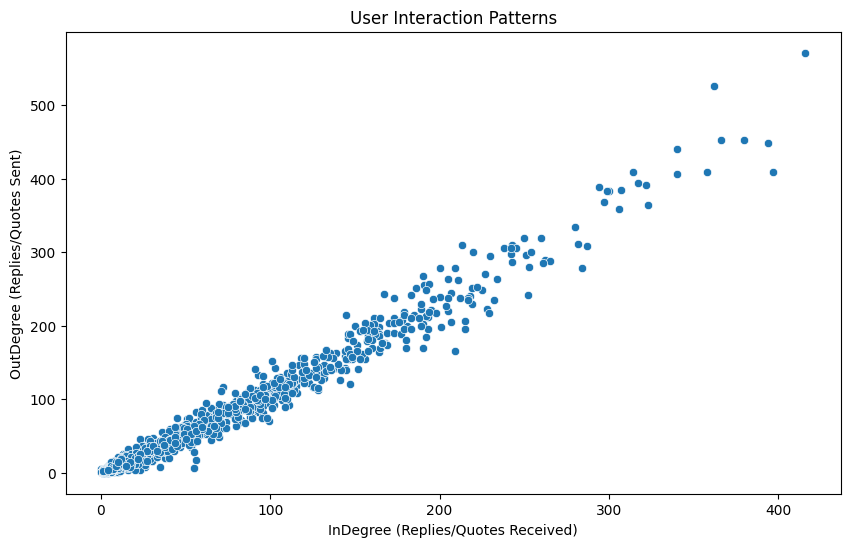

In [78]:
# User Interaction Patterns
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='InDegree', y='OutDegree', scatter_kws={'alpha':0.3})
plt.title('User Interaction Patterns')
plt.xlabel('InDegree (Replies/Quotes Received)')
plt.ylabel('OutDegree (Replies/Quotes Sent)')
plt.show()

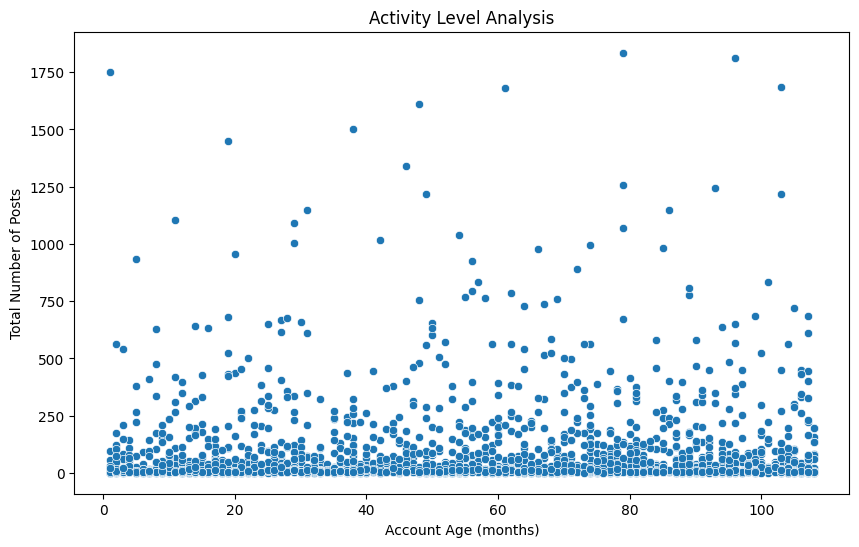

In [79]:
# Activity Level Analysis
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='AccountAge', y='TotalPosts', scatter_kws={'alpha':0.3})
plt.title('Activity Level Analysis')
plt.xlabel('Account Age (months)')
plt.ylabel('Total Number of Posts')
plt.show()

The scatter plot titled "Activity Level Analysis" demonstrates that a large number of accounts are concentrated at the lower end of the age and post count spectrum, implying that these accounts are relatively new and have not had much time to generate a significant number of posts. As accounts age, the distribution of data points becomes more dispersed, reflecting a broader diversity in posting behavior among more established accounts. This variation could be influenced by several factors, including shifts in how users engage with the platform over time, the specific objectives of different accounts, or the social media platform's strategies for growth and maintaining user engagement.

Although some of the older accounts exhibit high levels of posting activity, there is a noticeable range in the number of posts among these accounts, with many showing only moderate or low activity. Additionally, there are accounts with exceptionally high post counts that do not necessarily correlate with account age; these may represent highly active individual users or accounts operated by multiple people, such as those belonging to businesses or influencers.

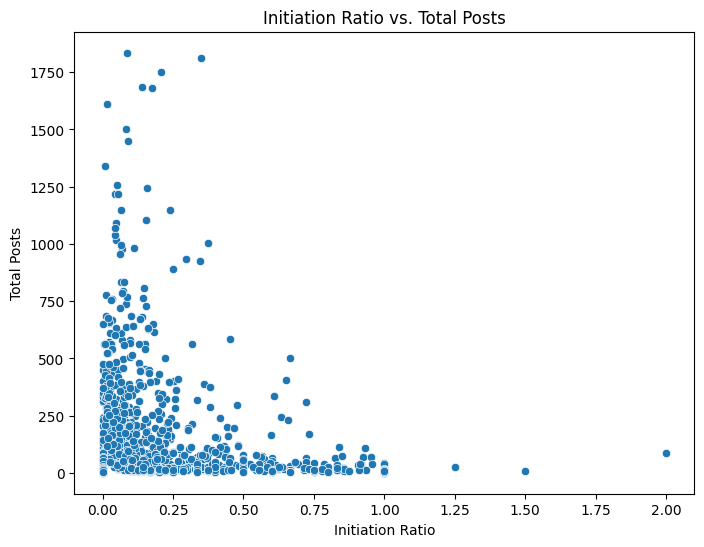

In [80]:
# Initiation Behavior Analysis
plt.figure(figsize=(8, 6))
sns.regplot(x='InitiationRatio', y='TotalPosts', data=df, scatter_kws={'alpha':0.3})
plt.title('Initiation Ratio vs. Total Posts')
plt.xlabel('Initiation Ratio')
plt.ylabel('Total Posts')
plt.show()

The scatter plot depicted the relationship between "Percentage of Bidirectional Neighbors" and "Total Posts". The majority of data points are clustered towards the lower-left corner of the graph, indicating that many users have a low percentage of bidirectional neighbors and a low total number of posts. As we move to the right along the x-axis, the number of posts generally increases, suggesting a positive correlation between these two variables. There are several outliers in the data. Some of these outliers have a high percentage of bidirectional neighbors but a relatively low total number of posts, while others have a high number of total posts regardless of their percentage of bidirectional neighbors. The distribution of data points along the "Total Posts" axis is right-skewed, This indicates that while most users have a lower number of posts, there is a subset with significantly higher posting activity. However, the positive correlation suggests that users or entities with more mutual connections tend to have higher posting activity, which could be of interest in studies of social media behavior, online community dynamics, or network theory.

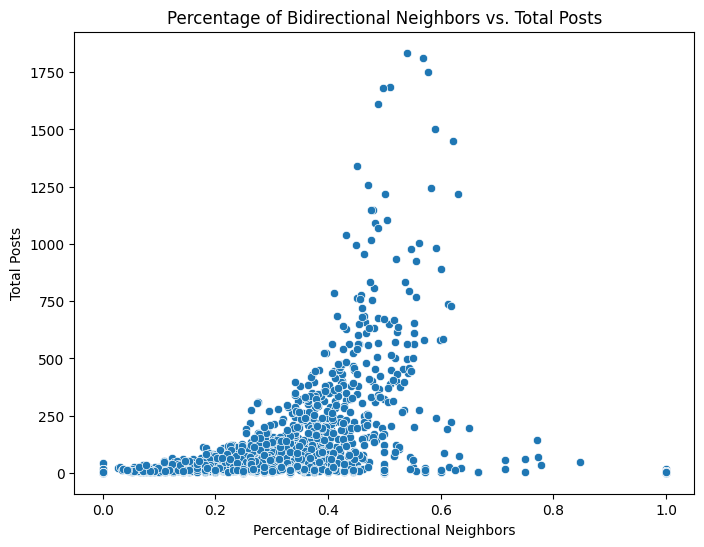

In [81]:
# Bidirectional Interaction Analysis
plt.figure(figsize=(8, 6))
sns.regplot(x='PercBiNeighbours', y='TotalPosts', data=df, scatter_kws={'alpha':0.3})
plt.title('Percentage of Bidirectional Neighbors vs. Total Posts')
plt.xlabel('Percentage of Bidirectional Neighbors')
plt.ylabel('Total Posts')
plt.show()

The scatter plot that visualizes the relationship between the "Percentage of Bidirectional Neighbors" and the "Total Posts". There appears to be a positive correlation between the percentage of bidirectional neighbors and the total number of posts. As the percentage of bidirectional neighbors increases, the total number of posts tends to increase as well, although the relationship is not perfectly linear. A dense cluster of data points is visible in the lower-left region of the plot, indicating that a significant portion of the users or entities have a relatively low percentage of bidirectional neighbors and a lower total number of posts.There are a few data points that appear as outliers, with either a very high percentage of bidirectional neighbors or a very high total number of posts compared to the majority of the data. The distribution of data points along the y-axis (Total Posts) appears to be skewed, with a longer tail towards higher values, suggesting that a smaller number of users or entities have significantly higher posting activity compared to the majority. 
This scatter plot can provide insights into the dynamics of the analyzed network or community, particularly regarding the relationship between user engagement (measured by total posts) and the degree of mutual interaction or reciprocal connections (measured by the percentage of bidirectional neighbors).

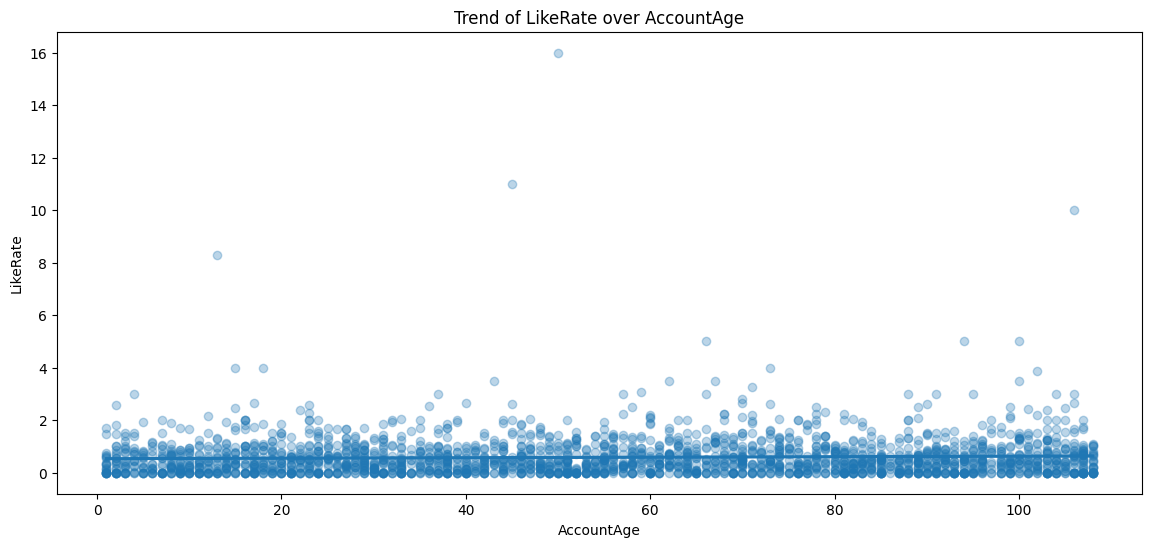

In [82]:
# Time-Based Trends
plt.figure(figsize=(14, 6))
sns.regplot(data=df, x='AccountAge', y='LikeRate', scatter_kws={'alpha':0.3})
plt.title('Trend of LikeRate over AccountAge')
plt.show()

The graph illustrates the relationship between the age of an account (AccountAge) and the rate at which content is liked (LikeRate). The scatter plot shows a wide dispersion of data points, with a concentration of points near the bottom of the graph, suggesting that many accounts have a low like rate regardless of account age. There are also a few points with a higher like rate, which appear to be outliers. However, the plot does not show a clear or strong trend between account age and like rate. The majority of accounts, especially those with a lower age, seem to have a low like rate, while only a few accounts exhibit a high like rate. This could suggest that account age is not a strong predictor of like rate, or that other factors may influence the like rate more significantly.


### Analyzing Engagement Patterns
Analyzes engagement patterns by calculating the average 'LikeRate', 'TotalPosts', and 'MeanWordCount' for accounts of different ages, provides insights into how engagement metrics such as the rate of likes, the number of posts, and the average word count of posts vary with the age of the account, potentially revealing trends or behaviors associated with account maturity.

In [83]:
engagingPattern=df.groupby('AccountAge')[['LikeRate', 'TotalPosts', 'MeanWordCount']].mean()

In [84]:
engagingPattern.head()

,LikeRate,TotalPosts,MeanWordCount
AccountAge,,,
1,0.357207,94.782609,58.964513
2,0.546918,56.375000,100.101275
3,0.516137,60.750000,89.798790
4,0.741592,40.187500,77.742294
5,0.441116,121.687500,100.559838


In [85]:
### Identifying Influential Users

Identifying Influential Users contains the median 'TotalPosts', 'LikeRate', and 'MeanWordCount' for users grouped by their 'InDegree'. This could be used to analyze the characteristics of influential users within the network, based on the assumption that users with a higher 'InDegree' are more influential.

In [86]:
# Identifying Influential Users
influence=df.groupby('InDegree')[['TotalPosts', 'LikeRate', 'MeanWordCount']].median()

In [87]:
influence.head()

,TotalPosts,LikeRate,MeanWordCount
InDegree,,,
0,2.0,0.000000,48.00000
1,1.0,0.000000,58.00000
2,2.0,0.000000,66.00000
3,3.0,0.111111,60.00000
4,4.0,0.278846,74.33335


### Content Analysis
Content Analysis helps in understanding how the proportion of questions in a user's posts correlates with the average rate at which their posts are liked. The index represents the bins of 'PercentQuestions' and the values represent the average 'LikeRate' for each bin.

In [89]:
# Content Analysis
df.groupby(pd.cut(df['PercentQuestions'], bins=[0, 0.25, 0.5, 0.75, 1]))['LikeRate'].mean()

PercentQuestions
(0.0, 0.25]    0.657267
(0.25, 0.5]    0.609819
(0.5, 0.75]    0.443229
(0.75, 1.0]    0.656246
Name: LikeRate, dtype: float64

In [90]:
### Engagement and Activity

Engagement and Activity helps in understanding how the average number of posts per thread correlates with user engagement (as measured by 'LikeRate') and the user's network structure (as indicated by 'PercBiNeighbours'). The index represents the bins of 'MeanPostsPerThread' and the columns contain the average 'LikeRate' and 'PercBiNeighbours' for each bin. 


In [91]:
# Engagement and Activity
df.groupby(pd.cut(df['MeanPostsPerThread'], bins=4))[['LikeRate', 'PercBiNeighbours']].mean()

,LikeRate,PercBiNeighbours
MeanPostsPerThread,,
"(0.914, 22.5]",0.589374,0.237479
"(22.5, 44.0]",0.067178,0.590101
"(44.0, 65.5]",0.027273,0.780220
"(65.5, 87.0]",0.011494,0.521780


In [92]:
## Data Manupilation 

In [93]:
# Feature Engineering
df['EngagementRatio'] = (df['InDegree'] + df['OutDegree'] + df['LikeRate'] + df['TotalPosts'] + df['PercentQuestions']) / 5  # Avoid division by zero
# df['ActivityLevel'] = pd.cut(df['TotalPosts'], bins=[-1, 10, 100, float('inf')], labels=['Low', 'Medium', 'High'])
df['EngagementQuality'] = (df['LikeRate'] + df['MeanWordCount'] + df['PercentQuestions']) / 3
df['ContentDiversity'] = (df['PercentURLs'] + df['PercentQuestions']) / 2
df['EngagementIndex'] = (df['InDegree'] + df['OutDegree'] + df['LikeRate']) / 3
df['ContentQuality'] = (df['MeanWordCount'] * df['LikeRate']) / 2
df['ActivityRatio'] = df['TotalPosts'] / (df['AccountAge'] + 1)  # Avoid division by zero
df['InteractionBalance'] = df['InDegree'] - df['OutDegree']
df['QuestionEngagement'] = df['PercentQuestions'] * df['LikeRate']
df['EngagementScore'] = (df['LikeRate'] + df['PercBiNeighbours'] + df['MeanWordCount']) / 3

<!-- 1. **`ActivityLevel`:** This feature categorizes users based on their total number of posts into 'Low', 'Medium', or 'High' activity levels. It's useful for understanding user behavior patterns and segmenting users based on their posting frequency.
 -->
1. **`EngagementQuality`:** By averaging the 'LikeRate', 'MeanWordCount', and 'PercentQuestions', this feature aims to quantify the overall quality of engagement. It could help in assessing how well users are interacting with content.

2. **`ContentDiversity`:** This feature is the average of 'PercentURLs' and 'PercentQuestions', providing a measure of the variety in the content posted by users. A higher diversity score might indicate a user who posts a mix of content, potentially engaging a broader audience.

3. **`EngagementIndex`:** Combining 'InDegree', 'OutDegree', and 'LikeRate' gives a holistic view of a user's network engagement. This could reflect both the user's popularity and their level of interaction with others.

4. **`ContentQuality`:** This feature is a product of 'MeanWordCount' and 'LikeRate', divided by two. It could be used to infer the quality of content based on its length and the engagement it receives.

5. **`ActivityRatio`:** By dividing 'TotalPosts' by 'AccountAge' (plus one to avoid division by zero), this feature normalizes posting activity by account age, providing insight into how active a user is relative to how long they've been on the platform.

6. **`InteractionBalance`:** This feature is the difference between 'InDegree' and 'OutDegree', which could indicate whether a user is more of a content consumer ('InDegree' higher) or a content producer ('OutDegree' higher).

7. **`QuestionEngagement`:** Multiplying 'PercentQuestions' by 'LikeRate' might show how engaging a user's questions are to their audience. This could be particularly useful for platforms where user interaction is a key metric.

8. **`EngagementScore`:** This feature is an average of 'LikeRate', 'PercBiNeighbours', and 'MeanWordCount'. It seems to be a composite metric that captures different dimensions of user engagement, such as popularity, network connectivity, and content depth.

In [94]:
df.head()

,ID,InDegree,OutDegree,TotalPosts,MeanWordCount,LikeRate,PercentQuestions,PercentURLs,MeanPostsPerThread,InitiationRatio,MeanPostsPerSubForum,PercBiNeighbours,AccountAge,EngagementRatio,EngagementQuality,ContentDiversity,EngagementIndex,ContentQuality,ActivityRatio,InteractionBalance,QuestionEngagement,EngagementScore
0,0,53,54,83,63.0,0.759036,0.325301,0.072289,1.596154,0.192308,9.222222,0.289157,108,38.216867,21.361446,0.198795,35.919679,23.909634,0.761468,-1,0.246915,21.349398
1,1,25,25,67,151.0,0.089552,0.104478,0.074627,2.913043,0.826087,67.000000,0.351351,54,23.438806,50.398010,0.089553,16.696517,6.761176,1.218182,0,0.009356,50.480301
2,2,4,3,4,65.0,0.250000,0.000000,0.000000,2.000000,0.500000,2.000000,0.000000,55,2.250000,21.750000,0.000000,2.416667,8.125000,0.071429,1,0.000000,21.750000
3,3,79,84,191,33.0,0.837696,0.157068,0.036649,1.929293,0.111111,14.692308,0.405172,43,70.998953,11.331588,0.096859,54.612565,13.821984,4.340909,-5,0.131575,11.414289
4,4,2,3,3,25.0,0.000000,0.333333,0.000000,1.000000,0.000000,1.500000,0.250000,89,1.666667,8.444444,0.166666,1.666667,0.000000,0.033333,-1,0.000000,8.416667


In [95]:
new_df=df[['EngagementScore', 'ContentDiversity', 'EngagementQuality', 'EngagementIndex', 'ContentQuality', 'ActivityRatio', 'InteractionBalance', 'QuestionEngagement']]
new_df.describe()

,EngagementScore,ContentDiversity,EngagementQuality,EngagementIndex,ContentQuality,ActivityRatio,InteractionBalance,QuestionEngagement
count,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000
mean,38.506020,0.182207,38.525002,25.421152,40.970092,2.866011,-3.038145,0.173032
std,49.917986,0.139060,49.937327,41.741800,141.044800,20.063913,13.379066,0.482204
min,0.000000,0.000000,0.000000,0.333333,0.000000,0.009174,-164.000000,0.000000
25%,15.281730,0.093750,15.296027,2.333333,1.897212,0.081633,-3.000000,0.000000
50%,25.310056,0.166666,25.304136,7.212121,14.000000,0.326923,0.000000,0.087396
75%,44.276860,0.250000,44.333333,28.365935,37.717219,1.549235,2.000000,0.222222
max,1039.666667,1.000000,1040.000000,329.225192,3896.000000,876.000000,49.000000,16.000000


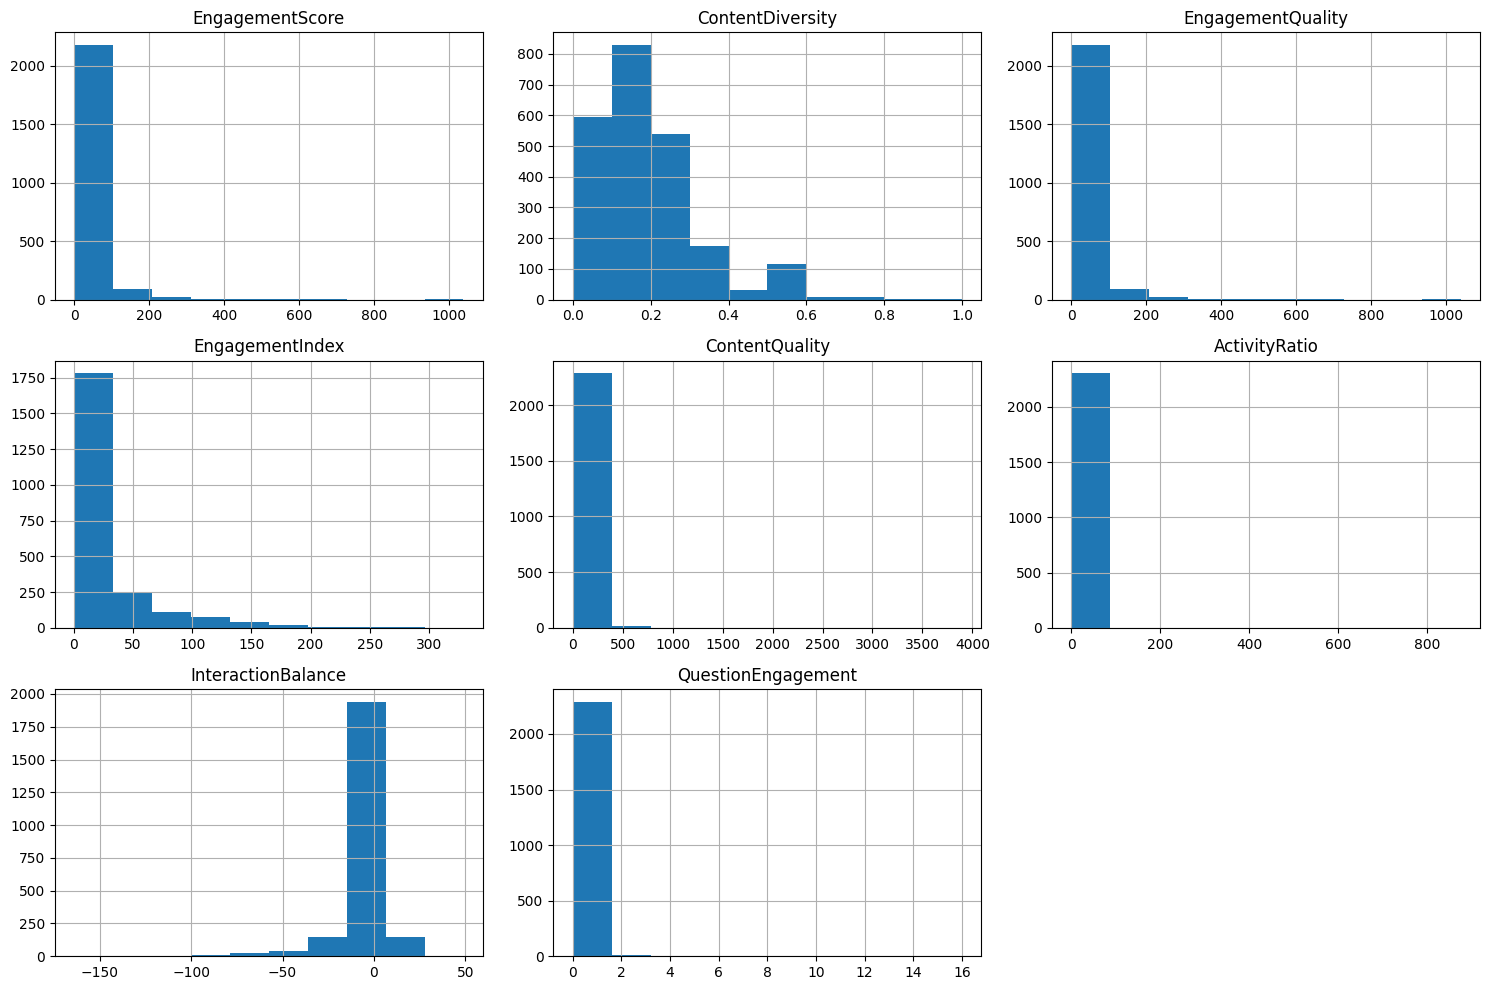

In [96]:
# Histograms for the distribution of new features
new_df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

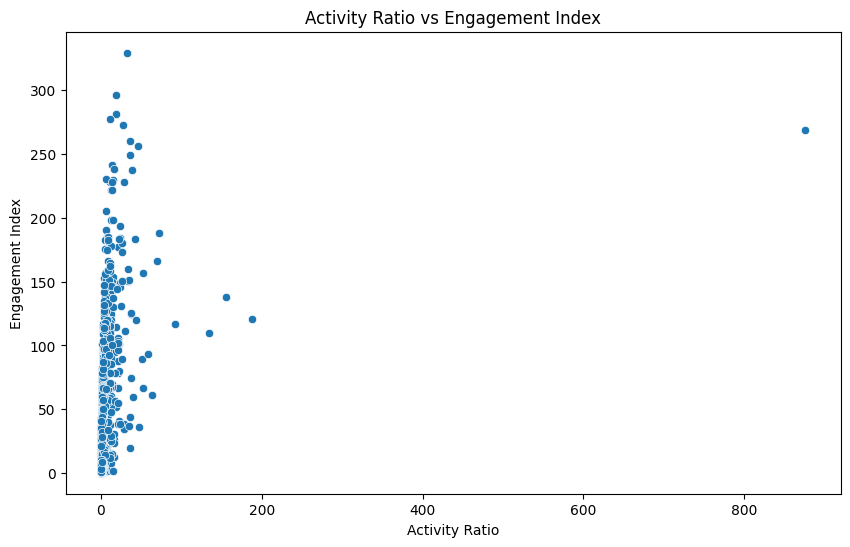

In [97]:
# Scatter plot for ActivityRatio vs EngagementIndex
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ActivityRatio', y='EngagementIndex')
plt.title('Activity Ratio vs Engagement Index')
plt.xlabel('Activity Ratio')
plt.ylabel('Engagement Index')
plt.show()

In [98]:
# # Select only numeric columns
# numeric_columns = new_df.select_dtypes(include=[np.number])

# # Compute correlation matrix
# new_df_correlation_matrix = numeric_columns.corr()

# # Plot correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(new_df_correlation_matrix, fmt=".2f")
# plt.title('Correlation Matrix for New Features')
# plt.show()

In [99]:
# # Post Characteristics Analysis
# post_characteristics = df[['MeanWordCount', 'PercentQuestions', 'PercentURLs', 'LikeRate']]
# post_characteristics_corr = post_characteristics.corr()
# print(post_characteristics_corr)

In [100]:
# plt.figure(figsize=(12, 10))
# sns.heatmap(post_characteristics_corr, annot=True, fmt=".2f")
# plt.title('Post Characteristics Matrix')
# plt.show()

In [101]:
# # User Engagement Analysis
# user_engagement = df[['InDegree', 'OutDegree', 'TotalPosts', 'LikeRate']]
# user_engagement_corr = user_engagement.corr()
# print(user_engagement_corr)

In [102]:
# plt.figure(figsize=(12, 10))
# sns.heatmap(user_engagement_corr, fmt=".2f")
# plt.title('User Engagement Matrix')
# plt.show()

In [103]:
# # Participation Patterns Analysis
# participation_patterns = df[['MeanPostsPerThread', 'MeanPostsPerSubForum']]
# participation_patterns_corr = participation_patterns.corr()
# print(participation_patterns_corr)

In [104]:
# plt.figure(figsize=(12, 10))
# sns.heatmap(participation_patterns_corr, fmt=".2f")
# plt.title('articipation Patterns Correlation Matrix')
# plt.show()

In [105]:
# Correlation Analysis
correlation_matrix = df.corr()
display(correlation_matrix)

,ID,InDegree,OutDegree,TotalPosts,MeanWordCount,LikeRate,PercentQuestions,PercentURLs,MeanPostsPerThread,InitiationRatio,MeanPostsPerSubForum,PercBiNeighbours,AccountAge,EngagementRatio,EngagementQuality,ContentDiversity,EngagementIndex,ContentQuality,ActivityRatio,InteractionBalance,QuestionEngagement,EngagementScore
ID,1.000000,0.083220,0.093579,0.030874,-0.003154,-0.045880,0.022107,-0.025955,0.027438,-0.033446,0.007815,-0.045996,-0.009475,0.055553,-0.003353,0.004314,0.088662,-0.021521,0.013919,-0.113332,-0.024602,-0.003449
InDegree,0.083220,1.000000,0.989398,0.911163,-0.045656,0.169758,0.019956,-0.042048,0.048037,-0.203393,0.450002,0.409063,0.032823,0.966577,-0.044698,-0.006446,0.996912,0.012995,0.332329,-0.679213,0.079775,-0.044208
OutDegree,0.093579,0.989398,1.000000,0.909932,-0.044227,0.165071,0.015228,-0.042639,0.050669,-0.218644,0.435720,0.396161,0.034725,0.966159,-0.043302,-0.010779,0.997713,0.012801,0.315861,-0.778601,0.078128,-0.042821
TotalPosts,0.030874,0.911163,0.909932,1.000000,-0.023857,0.124657,0.017106,-0.020599,0.090091,-0.140858,0.572998,0.386972,0.026577,0.985507,-0.023160,0.003052,0.912715,0.011278,0.401764,-0.661471,0.058709,-0.022687
MeanWordCount,-0.003154,-0.045656,-0.044227,-0.023857,1.000000,0.126126,0.276357,0.194554,0.008547,0.119961,0.002708,0.035736,-0.000307,-0.032596,0.999986,0.342164,-0.044178,0.461459,-0.012041,0.026233,0.189520,0.999986
LikeRate,-0.045880,0.169758,0.165071,0.124657,0.126126,1.000000,-0.004067,0.022437,-0.065001,-0.111611,0.031459,0.036444,0.039128,0.147710,0.131142,0.009015,0.173671,0.674635,0.045179,-0.100708,0.707358,0.131247
PercentQuestions,0.022107,0.019956,0.015228,0.017106,0.276357,-0.004067,1.000000,-0.027734,0.061726,0.102588,0.035130,0.094932,-0.025748,0.018385,0.277604,0.831757,0.017410,0.139514,0.012626,0.009266,0.275853,0.276264
PercentURLs,-0.025955,-0.042048,-0.042639,-0.020599,0.194554,0.022437,-0.027734,1.000000,-0.035305,0.190600,-0.012259,-0.059369,-0.005513,-0.030075,0.194412,0.531859,-0.042295,0.077267,-0.003759,0.033795,0.000016,0.194453
MeanPostsPerThread,0.027438,0.048037,0.050669,0.090091,0.008547,-0.065001,0.061726,-0.035305,1.000000,0.090601,0.227222,0.276753,0.009486,0.075093,0.008299,0.032685,0.049133,-0.026953,0.032924,-0.048502,-0.027336,0.008570
InitiationRatio,-0.033446,-0.203393,-0.218644,-0.140858,0.119961,-0.111611,0.102588,0.190600,0.090601,1.000000,-0.064822,0.017060,-0.027282,-0.173639,0.119414,0.192759,-0.212640,0.002197,-0.035720,0.226120,-0.036844,0.119322


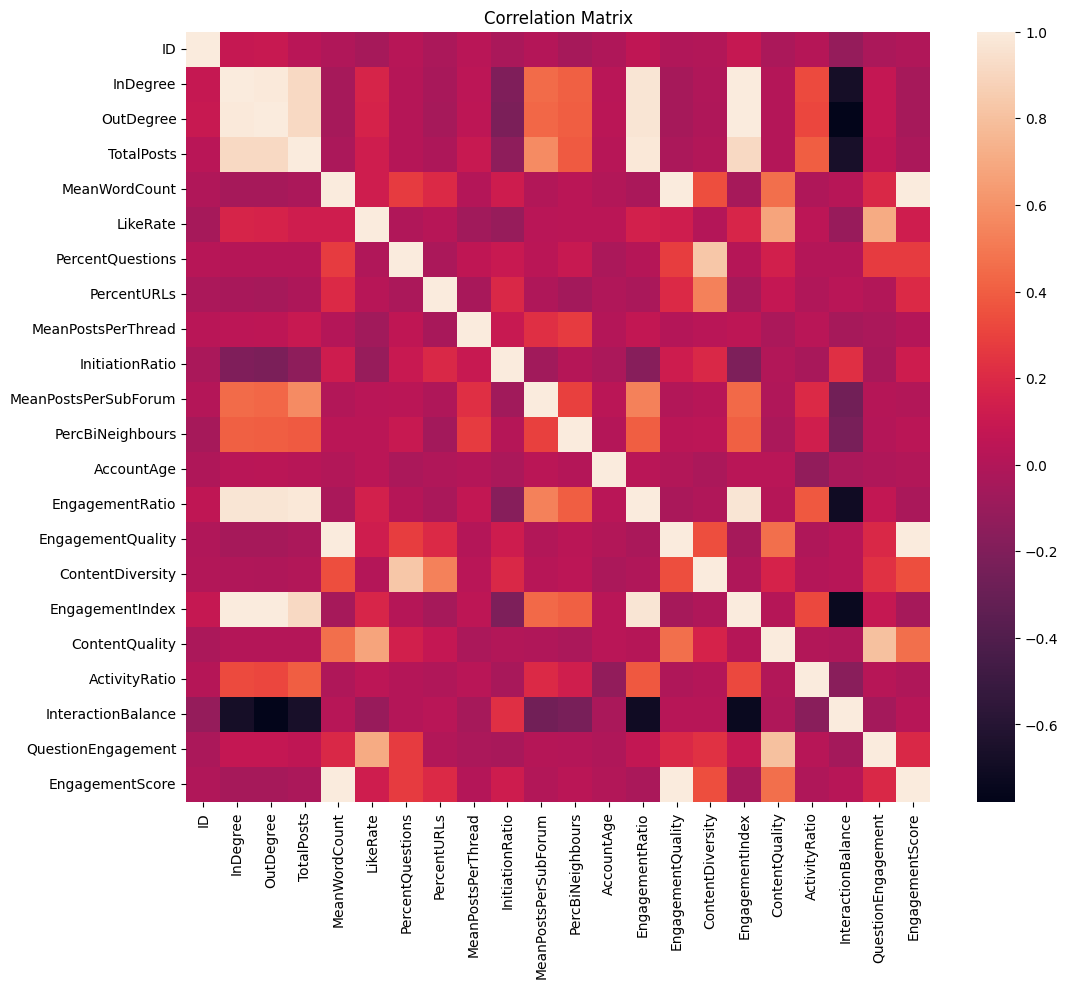

In [106]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Clustering 

In [107]:
df.head()

,ID,InDegree,OutDegree,TotalPosts,MeanWordCount,LikeRate,PercentQuestions,PercentURLs,MeanPostsPerThread,InitiationRatio,MeanPostsPerSubForum,PercBiNeighbours,AccountAge,EngagementRatio,EngagementQuality,ContentDiversity,EngagementIndex,ContentQuality,ActivityRatio,InteractionBalance,QuestionEngagement,EngagementScore
0,0,53,54,83,63.0,0.759036,0.325301,0.072289,1.596154,0.192308,9.222222,0.289157,108,38.216867,21.361446,0.198795,35.919679,23.909634,0.761468,-1,0.246915,21.349398
1,1,25,25,67,151.0,0.089552,0.104478,0.074627,2.913043,0.826087,67.000000,0.351351,54,23.438806,50.398010,0.089553,16.696517,6.761176,1.218182,0,0.009356,50.480301
2,2,4,3,4,65.0,0.250000,0.000000,0.000000,2.000000,0.500000,2.000000,0.000000,55,2.250000,21.750000,0.000000,2.416667,8.125000,0.071429,1,0.000000,21.750000
3,3,79,84,191,33.0,0.837696,0.157068,0.036649,1.929293,0.111111,14.692308,0.405172,43,70.998953,11.331588,0.096859,54.612565,13.821984,4.340909,-5,0.131575,11.414289
4,4,2,3,3,25.0,0.000000,0.333333,0.000000,1.000000,0.000000,1.500000,0.250000,89,1.666667,8.444444,0.166666,1.666667,0.000000,0.033333,-1,0.000000,8.416667


In [108]:
df.columns

Index(['ID', 'InDegree', 'OutDegree', 'TotalPosts', 'MeanWordCount',
       'LikeRate', 'PercentQuestions', 'PercentURLs', 'MeanPostsPerThread',
       'InitiationRatio', 'MeanPostsPerSubForum', 'PercBiNeighbours',
       'AccountAge', 'EngagementRatio', 'EngagementQuality',
       'ContentDiversity', 'EngagementIndex', 'ContentQuality',
       'ActivityRatio', 'InteractionBalance', 'QuestionEngagement',
       'EngagementScore'],
      dtype='object')

In [109]:
# Select the columns for clustering
selected_columns = ['InDegree', 'OutDegree', 'TotalPosts', 'LikeRate', 'AccountAge']
data = df[selected_columns]

1. **InDegree**: This metric typically represents the number of connections or relationships a user has within the network, where others have initiated the connection (e.g., followers on social media). A higher 'InDegree' suggests that the user is more popular or influential within the network. Clustering users based on their 'InDegree' can help identify influential users or opinion leaders within the community.

2. **OutDegree**: In contrast to 'InDegree', 'OutDegree' measures the number of connections or relationships initiated by the user (e.g., the accounts they follow). This metric can indicate how active or engaged a user is in seeking out content or connections within the platform. Clustering based on 'OutDegree' can reveal users who are actively exploring the network and potentially contributing to its vibrancy.

3. **TotalPosts**: The total number of posts made by a user is a direct measure of their activity level on the platform. Users who post frequently are likely more engaged and contribute significantly to the content available on the platform. Clustering users by 'TotalPosts' can help identify highly active users versus lurkers or less active members.

4. **LikeRate**: This metric could represent the average number of likes (or similar forms of positive feedback) received per post by a user. A high 'LikeRate' suggests that the content posted by the user is well-received by the community, indicating the user's ability to generate engaging or valuable content. Clustering based on 'LikeRate' can help identify users whose contributions are particularly appreciated by the community.

5. **AccountAge**: The age of a user's account can provide insights into the user's experience and longevity on the platform. Older accounts might belong to early adopters or long-term members who have witnessed the evolution of the community, while newer accounts might indicate recent joiners. Clustering by 'AccountAge' can help differentiate between these groups, potentially revealing differences in usage patterns or engagement levels.

By focusing on these columns for clustering analysis, the goal is to segment the user base into meaningful groups based on their engagement patterns, popularity, content contribution, and tenure on the platform. This segmentation can inform targeted strategies for community management, content recommendation, and user engagement initiatives.

In [110]:
# from sklearn_extra.cluster import KMedoids

# # Assuming X is your data
# inertias = []
# for k in range(1, 11):  # Test 1 to 10 clusters
#     model = KMedoids(n_clusters=k, random_state=42)
#     model.fit(data)
#     inertias.append(model.inertia_)

# plt.figure(figsize=(8, 4))
# plt.plot(range(1, 11), inertias, 'bo-')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method For Optimal k')
# plt.show()


In [111]:
# from sklearn.metrics import silhouette_score

# silhouette_scores = []
# for k in range(2, 11):  # Silhouette score is not defined for a single cluster
#     model = KMedoids(n_clusters=k, random_state=42)
#     model.fit(data)
#     silhouette_scores.append(silhouette_score(data, model.labels_))

# plt.figure(figsize=(8, 4))
# plt.plot(range(2, 11), silhouette_scores, 'bo-')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Method For Optimal k')
# plt.show()

In [113]:
pip install scikit-learn-extra

  Using cached scikit_learn_extra-0.3.0-cp311-cp311-macosx_11_0_arm64.whl
Note: you may need to restart the kernel to use updated packages.


In [115]:
pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
Note: you may need to restart the kernel to use updated packages.


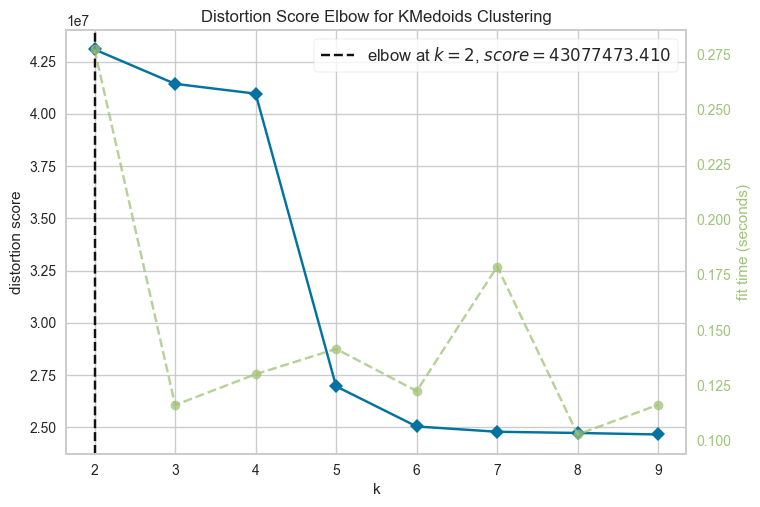

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [116]:
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the KMedoids model
model = KMedoids()

# Instantiate the KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(2,10))  # Adjust the range of k as needed

# Fit the visualizer to the data
visualizer.fit(data)

# Visualize the elbow plot
visualizer.show()


In [117]:
# The optimal number of clusters from the visualizer
optimal_k = visualizer.elbow_value_

# Perform K-Medoids clustering with the optimal number of clusters
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
kmedoids.fit(data)

# Assign the clusters to the dataframe
df['Cluster'] = kmedoids.labels_

In [118]:
# Print the assigned clusters for each data point
print("Assigned clusters for the data points:")
display(df.head())

Assigned clusters for the data points:


,ID,InDegree,OutDegree,TotalPosts,MeanWordCount,LikeRate,PercentQuestions,PercentURLs,MeanPostsPerThread,InitiationRatio,MeanPostsPerSubForum,PercBiNeighbours,AccountAge,EngagementRatio,EngagementQuality,ContentDiversity,EngagementIndex,ContentQuality,ActivityRatio,InteractionBalance,QuestionEngagement,EngagementScore,Cluster
0,0,53,54,83,63.0,0.759036,0.325301,0.072289,1.596154,0.192308,9.222222,0.289157,108,38.216867,21.361446,0.198795,35.919679,23.909634,0.761468,-1,0.246915,21.349398,0
1,1,25,25,67,151.0,0.089552,0.104478,0.074627,2.913043,0.826087,67.000000,0.351351,54,23.438806,50.398010,0.089553,16.696517,6.761176,1.218182,0,0.009356,50.480301,0
2,2,4,3,4,65.0,0.250000,0.000000,0.000000,2.000000,0.500000,2.000000,0.000000,55,2.250000,21.750000,0.000000,2.416667,8.125000,0.071429,1,0.000000,21.750000,0
3,3,79,84,191,33.0,0.837696,0.157068,0.036649,1.929293,0.111111,14.692308,0.405172,43,70.998953,11.331588,0.096859,54.612565,13.821984,4.340909,-5,0.131575,11.414289,1
4,4,2,3,3,25.0,0.000000,0.333333,0.000000,1.000000,0.000000,1.500000,0.250000,89,1.666667,8.444444,0.166666,1.666667,0.000000,0.033333,-1,0.000000,8.416667,0


In [119]:
df.Cluster.value_counts()

Cluster
0    1966
1     341
Name: count, dtype: int64

In [120]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette_avg = silhouette_score(data, kmedoids.labels_)
print("Silhouette Score:", silhouette_avg)

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(data, kmedoids.labels_)
print("Calinski-Harabasz Index:", calinski_harabasz)

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data, kmedoids.labels_)
print("Davies-Bouldin Index:", davies_bouldin)

Silhouette Score: 0.7462389212666204
Calinski-Harabasz Index: 2925.565923988848
Davies-Bouldin Index: 0.670245809730657


### Silhouette Score
- **Range**: The Silhouette Score ranges from -1 to 1.
- **Your Score**: A Silhouette Score of 0.7462389212666204 is quite high, suggesting that the clusters are well separated and that each data point is, on average, closer to other points in its own cluster than to points in other clusters.

### Calinski-Harabasz Index (CH Index)
- **Range**: The CH Index is not bounded and higher values are better.
- **Your Score**: A CH Index of 2925.565923988848 is relatively high, which typically indicates that the clustering has a good separation between clusters, with tight clusters that are far apart.

### Davies-Bouldin Index (DB Index)
- **Range**: The DB Index ranges from 0 to infinity, where lower values indicate better clustering.
- **Your Score**: A DB Index of 0.670245809730657 is low, which suggests that the clusters are well separated and each cluster is compact, which is desirable in clustering.

Overall, your clustering evaluation metrics indicate that the clustering quite good. The clusters are well separated from each other (as shown by the high Silhouette Score and CH Index) and are compact (as indicated by the low DB Index). This means that the data points within each cluster are similar to each other and distinct from points in other clusters, which is the goal of clustering.

In [121]:
# Analyze the clusters
cluster_1 = df[df['Cluster'] == 0]
cluster_2 = df[df['Cluster'] == 1]

In [122]:
# printing out the mean values of the columns for each cluster to understand their profiles
print("Cluster 1 mean values:")
cluster_1[selected_columns].mean()

Cluster 1 mean values:


InDegree      16.241099
OutDegree     16.195829
TotalPosts    23.388606
LikeRate       0.541749
AccountAge    55.518311
dtype: float64

In [123]:
print("Cluster 2 mean values:")
cluster_2[selected_columns].mean()

Cluster 2 mean values:


InDegree      152.076246
OutDegree     172.891496
TotalPosts    404.354839
LikeRate        0.849611
AccountAge     58.275660
dtype: float64

### Cluster 1 Characteristics
- **Lower Engagement and Activity**: The mean values for 'InDegree', 'OutDegree', and 'TotalPosts' are significantly lower compared to Cluster 2. This suggests that users in Cluster 1 are less active or influential within the network, having fewer connections and interactions.
- **Moderate LikeRate**: The 'LikeRate' is moderate, indicating that while these users may not post or interact as much, the content they do engage with or produce is reasonably well-received.
- **Slightly Younger Accounts**: The 'AccountAge' is slightly lower on average than in Cluster 2, suggesting these accounts are relatively newer to the platform.

### Cluster 2 Characteristics
- **Higher Engagement and Activity**: Users in this cluster have much higher 'InDegree', 'OutDegree', and 'TotalPosts' mean values, indicating they are more active, have more connections, and interact more within the network.
- **Higher LikeRate**: The 'LikeRate' is also higher, suggesting that not only are these users more active, but the content they engage with or produce is highly appreciated by others.
- **Slightly Older Accounts**: The 'AccountAge' is marginally higher than in Cluster 1, implying these accounts have been active on the platform for a longer period.

### Summary
- **Cluster 1** can be seen as representing **less active or newer users** who have moderate engagement levels and whose content receives a reasonable amount of appreciation.
- **Cluster 2** represents **highly active and slightly more established users** who are very engaged within the network, both in terms of interactions and content, which is also highly appreciated by others.

This segmentation could be useful for targeted marketing, personalized content delivery, or community management strategies, as it distinguishes between users based on their activity levels, engagement, and account age.

# Supervised Learning Model

Supervised learning is a type of machine learning where the model is trained on a labeled dataset. This dataset contains input-output pairs, where the model learns to predict the output from the input data. Once trained, the model can then be used to make predictions on new, unseen data. The "supervision" comes from the fact that the model is guided or taught with the correct answers during training.

Clustering analysis has been performed to segment users based on their behavior and characteristics such as engagement level, popularity, and activity on a platform. The clusters represent groups of users with similar traits. A supervised predictive model can take this a step further by predicting the cluster a new user might belong to based on their behavior and characteristics.

## Random Forest

Random Forest is an ensemble learning method that constructs a multitude of decision trees during training and outputs the mode of the classes (classification) or the mean prediction (regression) of the individual trees. Random Forest is robust against overfitting and is capable of handling both binary and multiclass classification problems efficiently. It combines the predictions from multiple decision trees to make a final decision, which often results in high accuracy. It's known for its robustness and good performance on many datasets without a lot of tweaking.

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assume 'Cluster_Labels' is a column with the cluster labels from your clustering
X = df.drop(['Cluster'], axis=1)  # Features
y = df['Cluster']  # Labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Predict the cluster for a new customer
# new_customer_data should be a DataFrame containing the feature values for the new customer
# new_customer_cluster = classifier.predict(new_customer_data)

Accuracy: 0.9935064935064936


In [125]:
## Support Vector Machine (SVM)

In [126]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = data
y = df['Cluster']        # Target variable (cluster labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Classifier
svm_model = SVC(kernel='linear', random_state=42)  # You can choose other kernels like 'rbf'

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict the cluster for the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:}")

# Predicting for new users
# Assuming 'new_users' is a DataFrame containing the features of new users
# new_users_scaled = scaler.transform(new_users[feature_columns])
# new_users['Predicted_Cluster'] = svm_model.predict(new_users_scaled)

# Now 'new_users' DataFrame has a new column 'Predicted_Cluster' with the predicted cluster labels

Model accuracy: 0.9935064935064936


### Benefits to the Client

1. **Targeted Marketing and Personalization**: Knowing which cluster a new user belongs to allows for more personalized marketing strategies. For example, users in a cluster characterized by high engagement and activity might be more receptive to regular updates and offers, while those in a cluster with low engagement might require a different approach to spark interest.

2. **Improved User Experience**: By understanding the cluster to which a user belongs, the client can tailor the user experience to match their preferences and behavior. This could include personalized content recommendations, user interface customization, or specific engagement strategies designed to increase user satisfaction and retention.

3. **Resource Optimization**: Predicting user clusters can help in allocating resources more efficiently. For instance, more support and engagement efforts can be directed towards users in clusters with higher value or potential for growth, ensuring that the client's resources are used where they are most likely to have an impact.

4. **Future Planning and Strategy Development**: The insights gained from the predictive model can inform future product development and strategy. Understanding the characteristics of different user segments can guide the development of new features, services, or content that caters to the needs and preferences of those segments.

5. **Risk Management**: For platforms where user behavior impacts the community or ecosystem (e.g., content platforms, social networks), predicting the cluster of a user can help in early identification of potentially harmful behavior, allowing for proactive measures to mitigate risks.

